In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)

(28, 28)


5

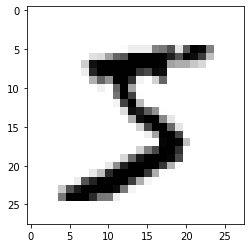

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")


# In[3]:


print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print()
print(x_train[0].shape)


# In[4]:


df = pd.DataFrame(np.reshape(x_train, (60000,784)))
df.head()


# In[5]:


plt.imshow(x_train[0], cmap="gray_r")
y_train[0]



In [4]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(512, activation="relu", input_shape=(784,)))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]) 

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [5]:
x_train = x_train.reshape(60000, 784)
# One-Hot-Encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)


# In[8]:


print(x_train.shape)
print(y_train.shape)


# In[9]:


model.fit(x_train, y_train, epochs=5, batch_size=128)


# In[10]:


x_test = x_test.reshape(10000, 784)
# One-Hot-Encoding
y_test = tf.keras.utils.to_categorical(y_test, 10)


# In[11]:


print(x_test.shape)
print(y_test.shape)


# In[12]:


model.evaluate(x_test, y_test)


# ## vgl. RFC

# In[13]:


y_pred = model.predict(x_test)


# In[14]:


y_pred[2]


# In[15]:


y_test[1]


# # MNIST 2

# In[16]:


model_history = model.fit(x_train, y_train, epochs=15, batch_size=128, validation_data=(x_test, y_test))
type(model_history.history)
acc = model_history.history["accuracy"]
acc


(60000, 784)
(60000, 10)
Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 4.9571 - accuracy: 0.9011
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.6931 - accuracy: 0.9535
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.4643 - accuracy: 0.9663
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.3870 - accuracy: 0.9720
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.3453 - accuracy: 0.9765
(10000, 784)
(10000, 10)
313/313 [==============================] - 0s 535us/step - loss: 0.8069 - accuracy: 0.9577
Epoch 1/15
469/469 [==============================] - 2s 5ms/step - loss: 0.3080 - accuracy: 0.9799 - val_loss: 0.7983 - val_accuracy: 0.9650
Epoch 2/15
469/469 [==============================] - 2s 5ms/step - loss: 0.2780 - accuracy: 0.9818 - val_loss: 0.8627 - val_accuracy: 0.9659
Epoch 3/15
469/469 [==============================] - 2s 5ms/step - loss: 0.2776

[0.9799166917800903,
 0.9818000197410583,
 0.9836500287055969,
 0.9859833121299744,
 0.9873666763305664,
 0.989133358001709,
 0.9893166422843933,
 0.9900166392326355,
 0.9899500012397766,
 0.9918000102043152,
 0.9917166829109192,
 0.9925666451454163,
 0.9931666851043701,
 0.9932166934013367,
 0.9940666556358337]

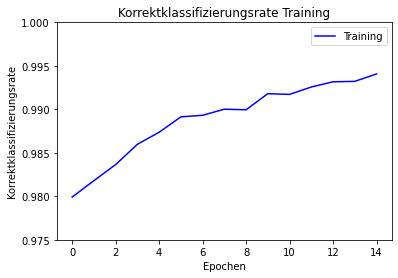

In [6]:
plt.plot(range(len(acc)), acc, 'b', label="Training") 
plt.title("Korrektklassifizierungsrate Training") 
plt.xlabel("Epochen") 
plt.ylabel("Korrektklassifizierungsrate")
plt.ylim(0.975,1)
plt.legend() 
plt.show()

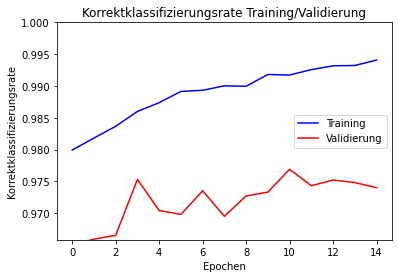

In [9]:
acc = model_history.history["accuracy"]
val = model_history.history["val_accuracy"]
plt.plot(range(len(acc)), acc, 'b', label="Training") 
plt.plot(range(len(val)), val, 'r', label="Validierung") 
plt.title("Korrektklassifizierungsrate Training/Validierung") 
plt.xlabel("Epochen") 
plt.ylabel("Korrektklassifizierungsrate") 
plt.ylim(0.9658, 1)
plt.legend( loc = 'center right')
plt.show()



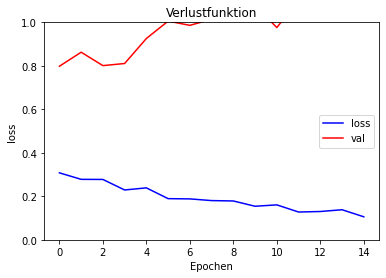

In [14]:
loss = model_history.history["loss"]
val = model_history.history["val_loss"]
plt.plot(range(len(acc)), loss, 'b', label="loss") 
plt.plot(range(len(val)), val, 'r', label="val") 
plt.title("Verlustfunktion") 
plt.xlabel("Epochen") 
plt.ylabel("loss") 
plt.ylim(0, 1)
plt.legend( loc = 'center right')
plt.show()



In [15]:
model.save

<bound method Model.save of <keras.engine.sequential.Sequential object at 0x0000026CD5B17D60>>